In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the bicycle model parameters (constant)
L = 2.0  # Wheelbase

In [4]:
v = 5.0  # Velocity (constant)
dt = 0.1  # Time step
total_time = 20.0  # Total simulation time

# Initialize the state variables
x = 0.0  # Initial x position
y = 0.0  # Initial y position
theta = np.pi / 4  # Initial orientation (45 degrees)
phi = np.pi / 18  # Steering angle (10 degrees)

# Time array
t = np.arange(0, total_time, dt)

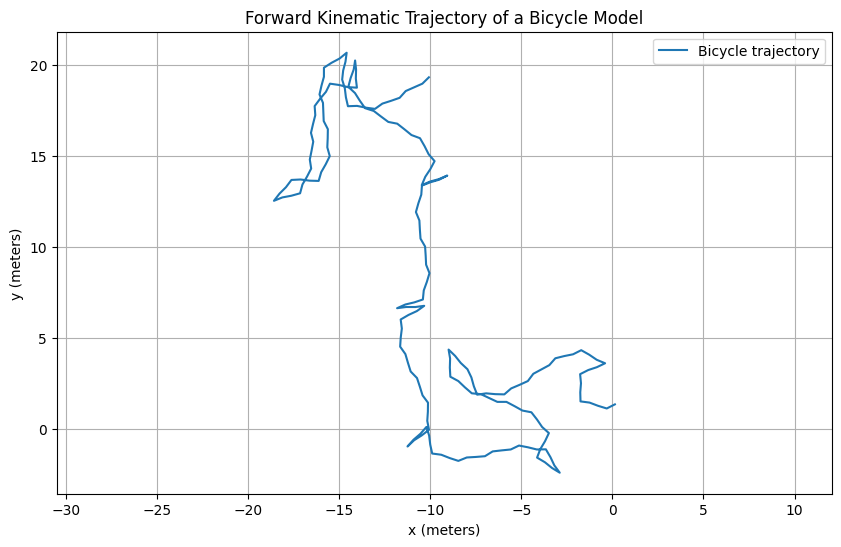

In [6]:
# Arrays to store the trajectory
x_traj = []
y_traj = []

# Simulation loop
for _ in t:
    phi += 1
    # Update the state variables using the kinematic equations
    x += v * np.cos(theta) * dt
    y += v * np.sin(theta) * dt
    theta += (v / L) * np.tan(phi) * dt
    
    # Store the trajectory
    x_traj.append(x)
    y_traj.append(y)

# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x_traj, y_traj, label='Bicycle trajectory')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Forward Kinematic Trajectory of a Bicycle Model')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [7]:
# Hybrid A*
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the environment
grid_size = (20, 20)
obstacles = [(5, 5), (5, 6), (6, 5), (6, 6), (10, 10), (10, 11), (11, 10), (11, 11)]

# Define the start and goal positions
start = (0, 0, 0)  # (x, y, theta)
goal = (19, 19)

# Define the bicycle model parameters
L = 2.0  # Wheelbase
dt = 0.1  # Time step

# Heuristic function
def heuristic(a, b):
    return np.hypot(b[0] - a[0], b[1] - a[1])

# Check if the position is within the grid and not an obstacle
def is_valid(x, y):
    return 0 <= x < grid_size[0] and 0 <= y < grid_size[1] and (x, y) not in obstacles

# Hybrid A* algorithm
def hybrid_a_star(start, goal):
    open_set = []
    heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        _, current = heappop(open_set)
        x, y, theta = current

        if (x, y) == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        # Generate possible moves considering kinematic constraints
        for phi in [-np.pi / 4, 0, np.pi / 4]:  # Steering angles
            x_new = x + np.cos(theta) * dt
            y_new = y + np.sin(theta) * dt
            theta_new = theta + (1 / L) * np.tan(phi) * dt

            if is_valid(int(x_new), int(y_new)):
                neighbor = (x_new, y_new, theta_new)
                tentative_g_score = g_score[current] + heuristic(current, neighbor)

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_set, (f_score[neighbor], neighbor))

    return []

# Find the path
path = hybrid_a_star(start, goal)

# Plot the environment and the path
plt.figure(figsize=(10, 10))
plt.grid(True)
plt.axis([0, grid_size[0], 0, grid_size[1]])

# Plot obstacles
for obs in obstacles:
    plt.plot(obs[0], obs[1], 'ks')

# Plot start and goal
plt.plot(start[0], start[1], 'go', markersize=10, label='Start')
plt.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

# Plot the path
if path:
    path_x, path_y = zip(*[(int(p[0]), int(p[1])) for p in path])
    plt.plot(path_x, path_y, 'b-', label='Path')

plt.legend()
plt.show()


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1075810d0>>
Traceback (most recent call last):
  File "/Users/donceykong/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

/var/folders/fv/s5blwn193fz2fb167y0f0fbw0000gn/T/ipykernel_16938/3735496632.py:93: UserWarning: frames=<generator object hybrid_a_star at 0x3e09a8580> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=planner, blit=True, repeat=False)


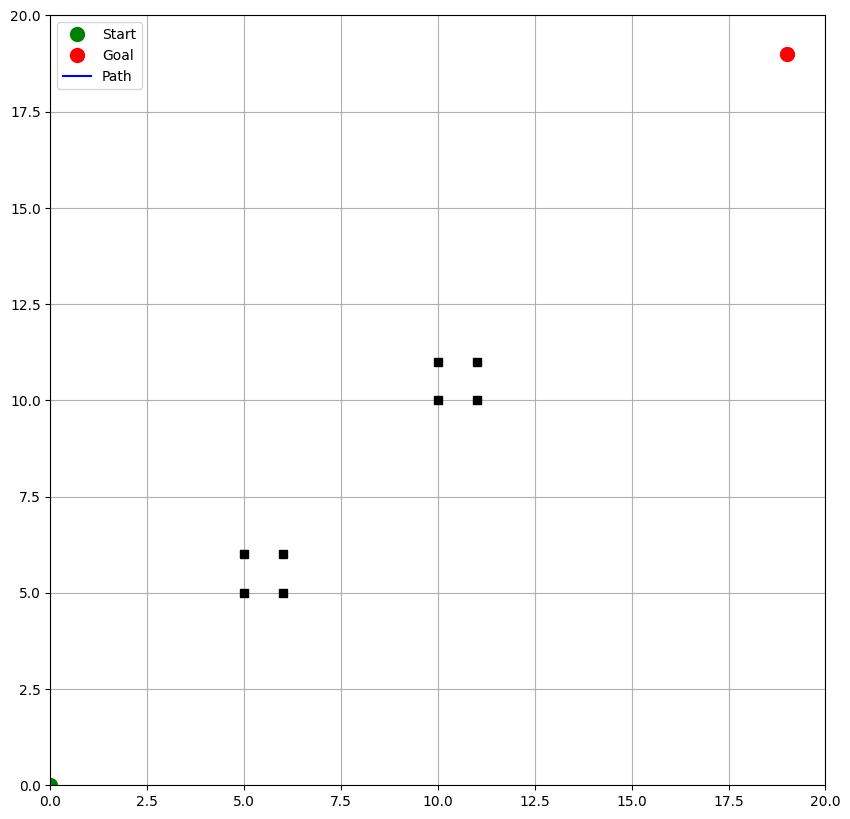

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush
from matplotlib.animation import FuncAnimation

# Define the environment
grid_size = (20, 20)
obstacles = [(5, 5), (5, 6), (6, 5), (6, 6), (10, 10), (10, 11), (11, 10), (11, 11)]

# Define the start and goal positions
start = (0, 0, 0)  # (x, y, theta)
goal = (19, 19)

# Define the bicycle model parameters
L = 2.0  # Wheelbase
dt = 0.1  # Time step

# Heuristic function
def heuristic(a, b):
    return np.hypot(b[0] - a[0], b[1] - a[1])

# Check if the position is within the grid and not an obstacle
def is_valid(x, y):
    return 0 <= x < grid_size[0] and 0 <= y < grid_size[1] and (x, y) not in obstacles

# Hybrid A* algorithm
def hybrid_a_star(start, goal):
    open_set = []
    heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    path = []

    while open_set:
        _, current = heappop(open_set)
        x, y, theta = current

        if (x, y) == goal:
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        # Generate possible moves considering kinematic constraints
        for phi in [-np.pi / 4, 0, np.pi / 4]:  # Steering angles
            x_new = x + np.cos(theta) * dt
            y_new = y + np.sin(theta) * dt
            theta_new = theta + (1 / L) * np.tan(phi) * dt

            if is_valid(int(x_new), int(y_new)):
                neighbor = (x_new, y_new, theta_new)
                tentative_g_score = g_score[current] + heuristic(current, neighbor)

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heappush(open_set, (f_score[neighbor], neighbor))

        path.append(current)
        yield path  # Yield the current path for animation

    yield path  # Final path

# Setup the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(True)
ax.set_xlim(0, grid_size[0])
ax.set_ylim(0, grid_size[1])

# Plot obstacles
for obs in obstacles:
    ax.plot(obs[0], obs[1], 'ks')

# Plot start and goal
ax.plot(start[0], start[1], 'go', markersize=10, label='Start')
ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')

# Initialize plot elements for the path
path_line, = ax.plot([], [], 'b-', label='Path')

# Animation update function
def update(path):
    if path:
        path_x, path_y = zip(*[(int(p[0]), int(p[1])) for p in path])
        path_line.set_data(path_x, path_y)
    return path_line,

# Create the animation
planner = hybrid_a_star(start, goal)
ani = FuncAnimation(fig, update, frames=planner, blit=True, repeat=False)

plt.legend()
plt.show()
